In [1]:
# Disable warnings
import warnings
warnings.filterwarnings('ignore')

import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
import matplotlib        as mpl
%matplotlib inline

# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.ensemble        import RandomForestClassifier,RandomForestRegressor
from sklearn.metrics         import roc_curve

# Plot settings
mpl.rcParams['legend.frameon' ] = False
mpl.rcParams['legend.fontsize'] = 'xx-large'
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16
mpl.rcParams['axes.titlesize' ] = 18
mpl.rcParams['axes.labelsize' ] = 18
mpl.rcParams['lines.linewidth'] = 2.5


# Useful functions
from utils import *

In [2]:
data = pd.read_csv('4topSM.csv')
df = pd.DataFrame(data)
cols = df.columns.tolist()
cols = cols[1:-1] + [cols[0]]
df = df[cols]
#df = df[df['nlep']>0] # Select events with at least one lepton
df.head()

,ht,njet,nbjet,nlep,met,met_phi,lep_pt0,lep_pt1,lep_pt2,lep_pt3,...,jet_isb0,jet_isb1,jet_isb2,jet_isb3,jet_isb4,jet_isb5,jet_isb6,jet_isb7,jet_isb8,m4top
0,363.195618,6,3,0,77.773085,1.056524,0.000000,0.000000,0.000000,0.0,...,0,0,1,1,0,1,0,0,0,1480.240498
1,739.406982,9,5,0,80.217866,-2.799677,0.000000,0.000000,0.000000,0.0,...,0,0,1,1,0,1,0,1,1,1279.838371
2,756.153748,9,5,1,51.067984,1.685508,125.348915,0.000000,0.000000,0.0,...,0,0,1,1,0,1,0,1,1,995.802801
3,708.742126,5,2,2,93.307299,3.023522,40.827286,169.840958,0.000000,0.0,...,0,0,1,1,0,1,0,1,1,1382.241903
4,567.742065,5,2,3,193.714731,2.289553,105.930557,25.705399,83.422684,0.0,...,0,0,1,1,0,1,0,1,1,2706.690433


In [3]:
data_ttV = pd.read_csv('ttV.csv')
df_ttV = pd.DataFrame(data_ttV)
cols = df_ttV.columns.tolist()
cols = cols[1:-1] + [cols[0]]
df_ttV = df_ttV[cols]
#df_ttV = df_ttV[df_ttV['nlep']>0] # Select events with at least one lepton
df_ttV.head()

,ht,njet,nbjet,nlep,met,met_phi,lep_pt0,lep_pt1,lep_pt2,lep_pt3,...,jet_isb0,jet_isb1,jet_isb2,jet_isb3,jet_isb4,jet_isb5,jet_isb6,jet_isb7,jet_isb8,m4top
0,898.933899,8,4,1,22.632032,-0.086053,88.720406,0.0,0.0,0.0,...,1,0,1,0,0,0,1,1,0,-99.0
1,563.983948,4,1,0,26.726042,1.816308,88.720406,0.0,0.0,0.0,...,0,0,0,1,0,0,1,1,0,-99.0
2,303.772491,6,1,0,0.000000,0.000000,88.720406,0.0,0.0,0.0,...,0,1,0,0,0,0,1,1,0,-99.0
3,515.249084,6,1,0,32.442406,1.914836,88.720406,0.0,0.0,0.0,...,0,1,0,0,0,0,1,1,0,-99.0
4,441.026398,5,2,0,23.852623,-1.567359,88.720406,0.0,0.0,0.0,...,0,0,1,1,0,0,1,1,0,-99.0


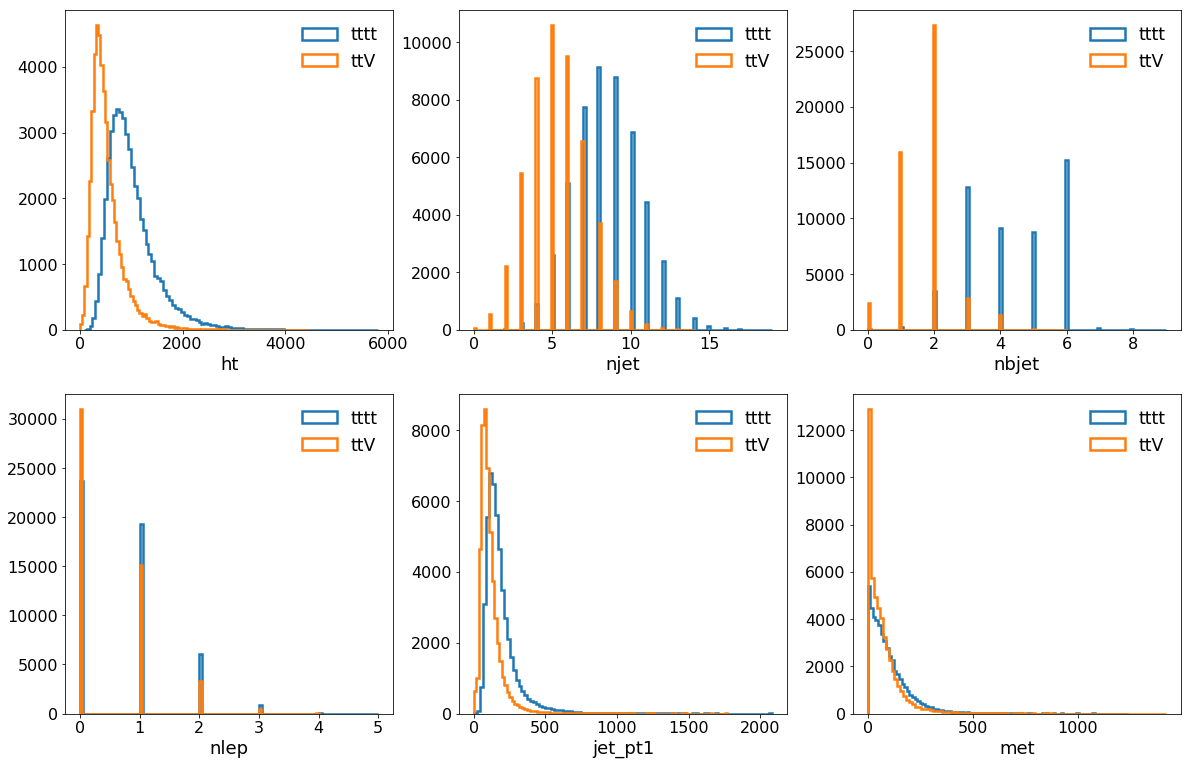

In [4]:
compare_4top_ttV_distributions(df,df_ttV,['ht','njet','nbjet','nlep','jet_pt1','met'])

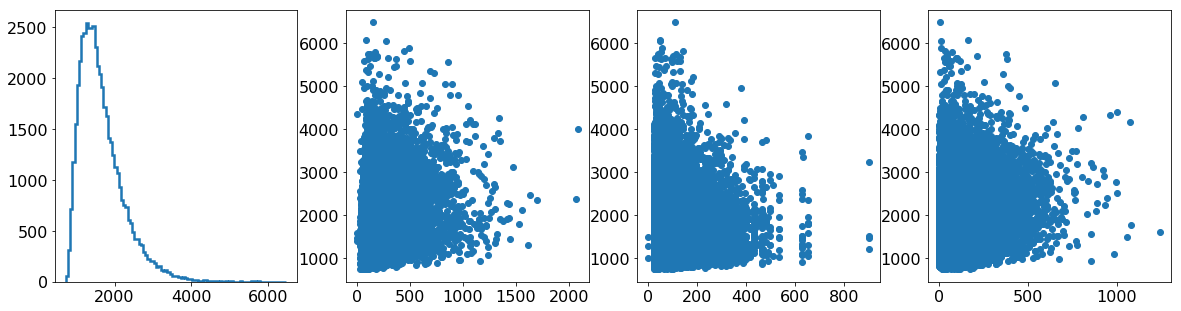

In [5]:
plt.figure(figsize=(20,5))
plt.subplot(141)
plt.hist(df['m4top'], bins=100, histtype='step', linewidth=2.5,label='tttt')
plt.subplot(142)
plt.scatter(df['jet_pt1'],df['m4top'])
plt.subplot(143)
plt.scatter(df['lep_pt1'],df['m4top'])
plt.subplot(144)
plt.scatter(df['met'],df['m4top'])

In [6]:
# Features and target
dataX = df.drop('m4top',axis=1)
dataY = df['m4top']

# Preparing cross validation samples
trainX, testX, trainY, testY = train_test_split(dataX, dataY, random_state=42, train_size=0.5)

In [7]:
rf_regre = RandomForestRegressor(n_estimators=100,n_jobs=-1,max_depth=10).fit(trainX, trainY)

In [8]:
from sklearn.ensemble    import AdaBoostRegressor
from sklearn.tree        import DecisionTreeRegressor
ab_regre = AdaBoostRegressor(n_estimators=10, base_estimator=DecisionTreeRegressor(max_depth=10)).fit(trainX, trainY)

In [9]:
from sklearn.ensemble import GradientBoostingRegressor
gb_regre = GradientBoostingRegressor(n_estimators=10, learning_rate=0.1, max_depth=10).fit(trainX,trainY)

In [10]:
#from xgboost.sklearn import XGBClassifier
#xgb_regre = XGBClassifier(n_estimators=10, learning_rate=0.1, max_depth=10).fit(trainX,trainY)

# --> eat too much memory and I am not sure why ...

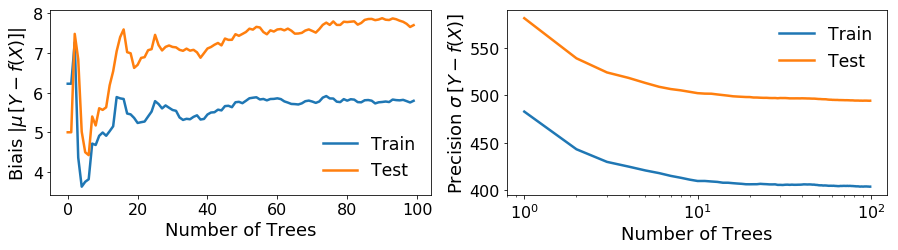

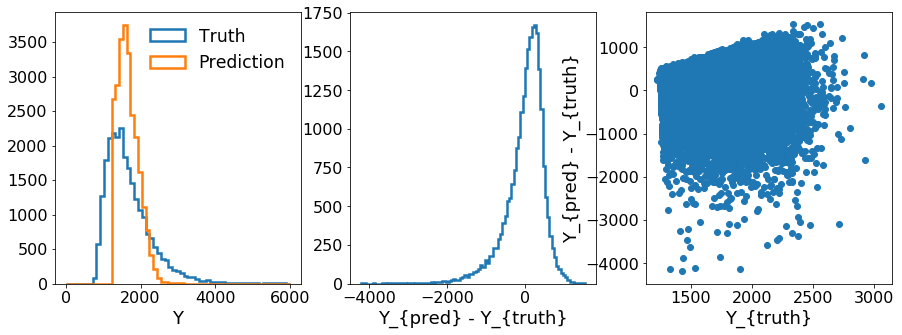

In [10]:
plot_perf_randomforest_vs_ntree(rf_regre,trainX,trainY,testX,testY)
plot_prediction_vs_truth(rf_regre,testX,testY)

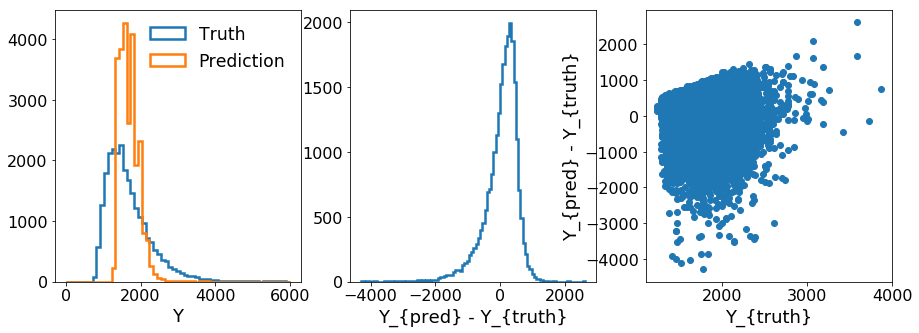

In [11]:
plot_prediction_vs_truth(ab_regre,testX,testY)

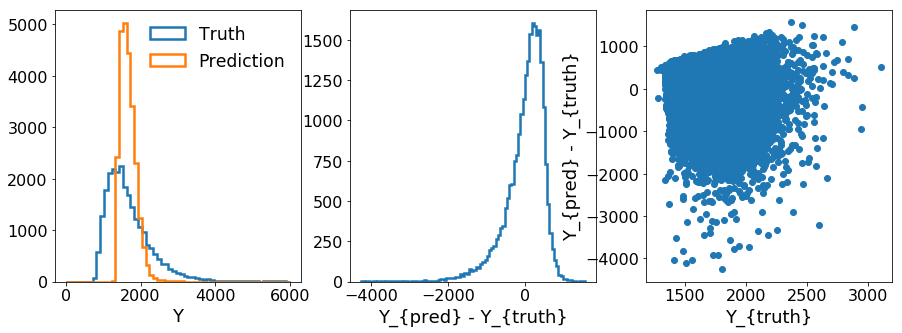

In [12]:
plot_prediction_vs_truth(gb_regre,testX,testY)

In [13]:
#plot_prediction_vs_truth(xgb_regre,testX,testY)

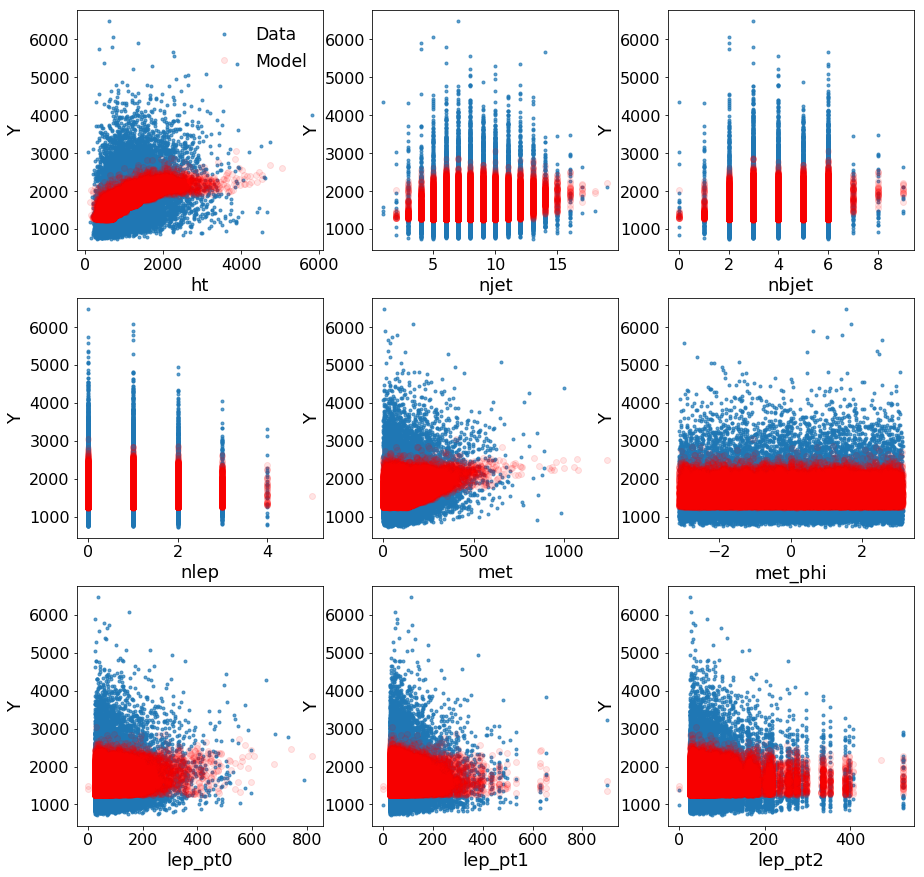

In [14]:
plot_prediction_ndim(rf_regre,testX,testY,trainX,trainY)

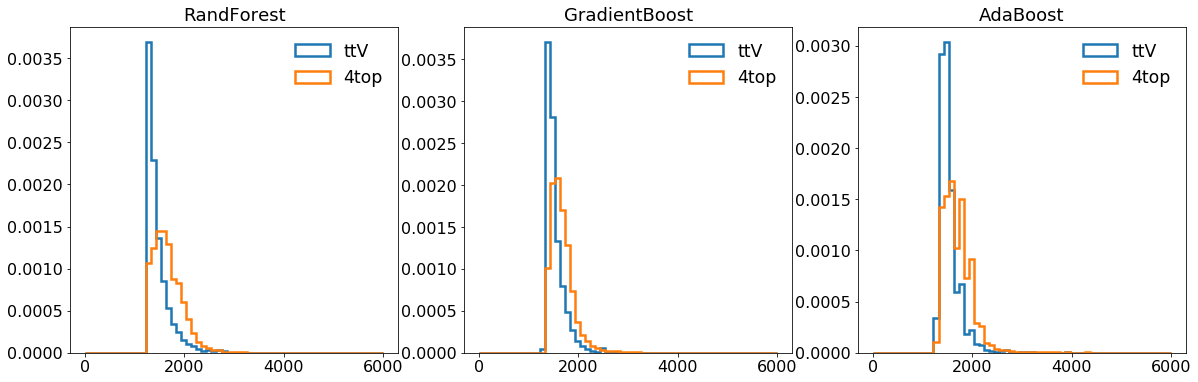

In [15]:
plt.figure(figsize=(20,6))
regressors=[[rf_regre,'RandForest'],[gb_regre,'GradientBoost'],[ab_regre,'AdaBoost']]
dataX_ttV = df_ttV.drop('m4top',axis=1)

i=0
for regre,name in regressors:
    i=i+1
    plt.subplot(1,3,i)
    plt.hist(regre.predict(dataX_ttV), density=True, bins=np.linspace(0,6000,60), histtype='step', linewidth=2.5, label='ttV')
    plt.hist(regre.predict(trainX)   , density=True, bins=np.linspace(0,6000,60), histtype='step', linewidth=2.5, label='4top')
    plt.title(name)
    plt.legend()

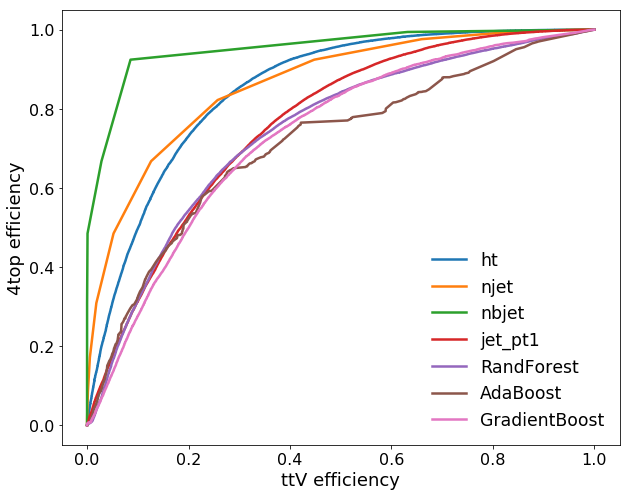

In [16]:
VariableToTest   = ['ht','njet','nbjet','jet_pt1']
RegressorsToTest = [[rf_regre,'RandForest'],[ab_regre,'AdaBoost'],[gb_regre,'GradientBoost']]
plot_roc_curves(df.drop('m4top',axis=1),df_ttV.drop('m4top',axis=1), VariableToTest, RegressorsToTest)

In [32]:
# Try classification
sig_labelled = df.drop(['m4top','ht'],axis=1)
sig_labelled['isSig'] = 1
bkg_labelled = df_ttV.drop(['m4top','ht'],axis=1)
bkg_labelled['isSig'] = 0
data  = pd.concat( [sig_labelled,bkg_labelled] )
dataX = data.drop('isSig',axis=1)
dataY = data['isSig']

# Preparing cross validation samples
trainX, testX, trainY, testY = train_test_split(dataX, dataY, random_state=42, train_size=0.5)

In [33]:
rf_regre = RandomForestRegressor(n_estimators=100,n_jobs=-1,max_depth=10).fit(trainX, trainY)

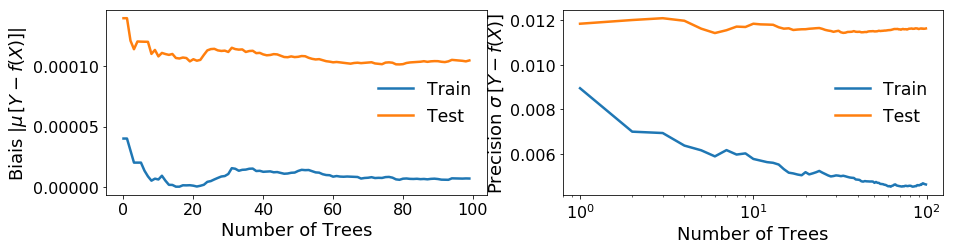

In [34]:
plot_perf_randomforest_vs_ntree(rf_regre,trainX,trainY,testX,testY)

(array([  2.49460000e+04,   5.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          2.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   2.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
        

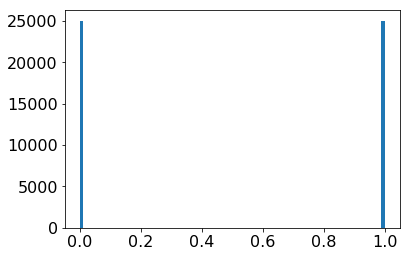

In [37]:
plt.hist(rf_regre.predict(testX), bins=100)
#plt.hist(rf_regre.predict(testX[testY==0]))